<a href="https://colab.research.google.com/github/trevinofernando/AI-MachineLearning/blob/master/hw1/Hw1Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solving linear regression using stochastic gradient descent 

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Initializing target equation

In [0]:
import numpy as np
np.random.seed(42)
realW1 = 3
realW2 = 5
realB = 4

x1s = 2 * np.random.rand(100, 1)
x2s = 3 * np.random.rand(100, 1)
ys = realB + realW1 * x1s + realW2 * x2s + np.random.rand(100, 1) 

## Plotting All Data in 3D view and Side View

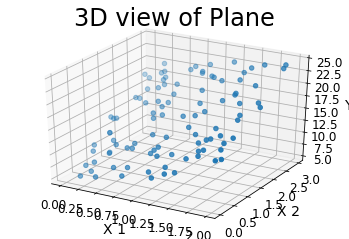

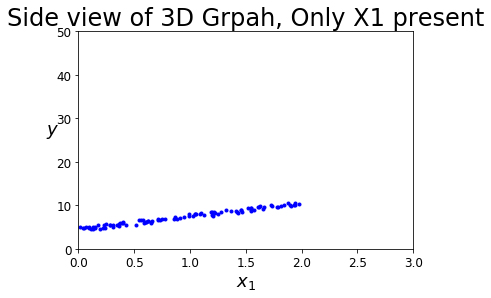

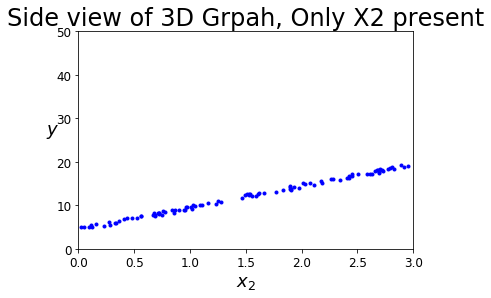

In [84]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1s, x2s, ys)
plt.title('3D view of Plane',fontsize=24)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('Y')
plt.show()

plt.plot(x1s, ys - realW2 * x2s, "b.")
plt.title('Side view of 3D Grpah, Only X1 present',fontsize=24)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 50])
plt.show()

plt.plot(x2s, ys - realW1 * x1s, "b.")
plt.title('Side view of 3D Grpah, Only X2 present',fontsize=24)
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 50])
plt.show()

In [0]:
# split the data into training and test sets
# train set
train_x1s = x1s[:80]
train_x2s = x2s[:80]
train_ys = ys[:80]
# test set
test_x1s = x1s[80:]
test_x2s = x2s[80:]
test_ys = ys[80:]


# Linear regression using numpy


In [0]:
# number of epochs
epochs = 10
# learning rate
lr = 0.01

In [0]:
# initial value for weight w and bias b
w1 = np.random.randn(1)
w2 = np.random.randn(1)
b = np.zeros(1)

In [0]:
for epoch in np.arange(epochs):
  for i in np.arange(80):
    y_pred = w1 * train_x1s[i] + w2 * train_x2s[i] + b
    
    grad_w1 = (y_pred - train_ys[i]) * train_x1s[i]
    grad_w2 = (y_pred - train_ys[i]) * train_x2s[i]
    grad_b = (y_pred - train_ys[i])
    
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
    b -= lr * grad_b

In [0]:
test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w1 * test_x1s[i] + w2 * test_x2s[i] + b - test_ys[i]) ** 2
test_loss /= 20

In [90]:
test_loss

array([0.05728981])

In [0]:
pred_ys = w1 * test_x1s + w2 * test_x2s + b

## Original (Blue) VS Prediction (Red)

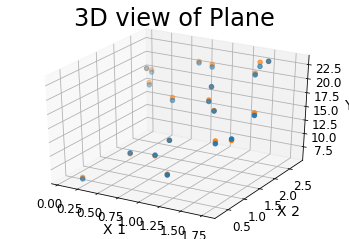

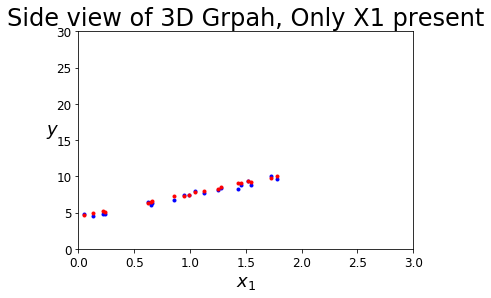

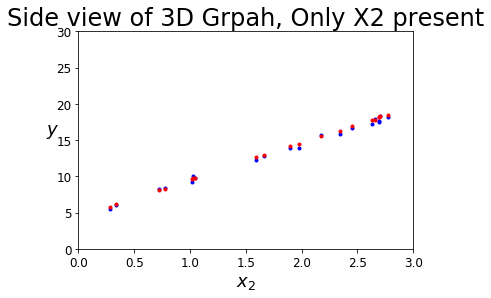

In [92]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(test_x1s, test_x2s, test_ys)
ax.scatter(test_x1s, test_x2s, pred_ys)
plt.title('3D view of Plane',fontsize=24)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('Y')
plt.show()

#By subtracting the "realW2 * test_x2s", we are ignoring one axis and looking at the 3d plane in an angle such that we see a straight line 
plt.plot(test_x1s, test_ys - realW2 * test_x2s, "b.")
plt.plot(test_x1s, pred_ys - realW2 * test_x2s, "r.") # predicted values
plt.title('Side view of 3D Grpah, Only X1 present',fontsize=24)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 30])
plt.show()

plt.plot(test_x2s, test_ys - realW1 * test_x1s, "b.")
plt.plot(test_x2s, pred_ys - realW1 * test_x1s, "r.") # predicted values
plt.title('Side view of 3D Grpah, Only X2 present',fontsize=24)
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 30])
plt.show()

### Numerical Comparison of Original VS Predicted data

In [93]:
print("b found: ")
print(b[0])
print("Real b: ")
print(realB)

b found: 
4.233884865955264
Real b: 
4


In [94]:
print("w1 found: ")
print(w1[0])
print("Real w1: ")
print(realW1)


w1 found: 
3.1714177381933806
Real w1: 
3


In [95]:
print("w1 found: ")
print(w2[0])
print("Real w1: ")
print(realW2)

w1 found: 
5.1089648892066855
Real w1: 
5
